In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [22]:
dropped_features = ['fg3a_per_g', 'mp_per_g', 'ast_pct', 'fta_per_g', 'fg2a_per_g', 
                    'fg3a_per_g', 'fg_per_g', 'orb_pct', 'drb_pct', 'blk_pct', 'drb_per_g',
                    'fga_per_g', 'g', 'trb_pct', 'ws_per_48', 'stl_pct', 'obpm', 'dbpm', 'usg_pct',
                    'age', 'ts_pct', 'dws', 'bpm', 'fg_pct', 'fg2_pct', 'ft_per_g',
                    'orb_per_g', 'tov_pct', 'fg3a_per_fga_pct', 'fg2_per_g', 'gs', 'ws', 'fta_per_fga_pct']

In [25]:
data = pd.read_csv('data/rookie_data_3_28_2024.csv')
data = data.drop(columns=['Unnamed: 0'])
rookies = data.fillna(0.0)
rookies = rookies.drop(columns=dropped_features)
pca_prep = rookies.drop(columns=['player', 'team_id', 'pos', 'svm_distance', 'first', 'share'])

In [26]:
awards = pd.read_csv('data/AwardVoteShare_2012-2023.csv')
df8 = awards[(awards['Award'] == 'ROTY')]
# df8.groupby('Year').max()
roty = df8.loc[df8.groupby('Year')['Share'].idxmax()]
roty_winners = roty['Player']
roty_winners


508             Damian Lillard
448    Michael Carter-Williams
391             Andrew Wiggins
334         Karl-Anthony Towns
292            Malcolm Brogdon
242                Ben Simmons
196                Luka Dončić
155                  Ja Morant
112                LaMelo Ball
67              Scottie Barnes
13              Paolo Banchero
Name: Player, dtype: object

In [27]:
roty_target = [1 if roty_winners.isin([player]).sum() > 0 else 0 for player in rookies['player'] ]

In [28]:
pca = PCA(n_components=2)
scaler = StandardScaler()
pca_prep = scaler.fit_transform(pca_prep)
pca_data = pca.fit_transform(pca_prep)
name_list = [player if pca_data[:,0][i] > 8 else " " for i, player in enumerate(rookies['player'])]

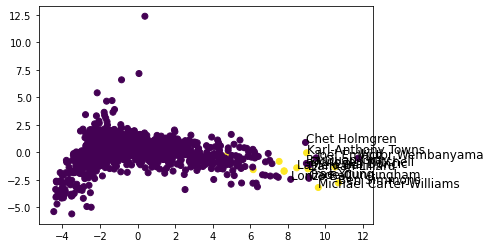

In [29]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=roty_target)
for i, txt in enumerate(name_list):
    plt.annotate(txt, (pca_data[:, 0][i], pca_data[:, 1][i]), fontsize=12)

# SVD Deconstruction

In [30]:
sigma1, sigma2 = pca.singular_values_
U1 = pca_data[:,0] / sigma1
U2 = pca_data[:,1] / sigma2

In [31]:
U1

array([-0.01522184,  0.00932592,  0.00452728, ...,  0.02363719,
        0.03012   , -0.02064562])

In [32]:
pca_data[:,0]

array([-1.3569929 ,  0.83138504,  0.40359697, ...,  2.10720291,
        2.68513092, -1.84051151])

In [33]:
pca_dists = []
for i in range(len(pca_data)):
    vector = np.array([U1[i], U2[i]])
    dist = np.linalg.norm(vector)
    pca_dists.append(dist)
    


In [34]:
rookies['pca_distance'] = pca_dists
rookies

,player,pos,team_id,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,stl_per_g,...,mp,per,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
0,Tosan Evbuomwan,SF,TOT,0.5,0.333,0.472,0.000,2.7,1.0,0.2,...,90,8.1,-0.1,2024,1,-14.749858,-1.118402,0.0,0.000,0.015852
1,Trey Jemison,C,TOT,0.0,0.000,0.487,0.778,3.7,0.8,0.4,...,171,9.4,-0.2,2024,1,-12.731156,0.900300,0.0,0.000,0.012665
2,Vasilije Micić,PG,TOT,0.5,0.243,0.457,0.765,1.0,3.4,0.4,...,590,9.1,-0.5,2024,1,-12.382941,1.248515,0.0,0.000,0.009767
3,Filip Petrušev,C,TOT,0.0,0.000,0.500,0.500,0.3,0.0,0.0,...,10,5.0,0.0,2024,1,-17.114631,-3.483174,0.0,0.000,0.036634
4,Ibou Badji,C,POR,0.0,0.000,0.632,0.500,2.7,0.7,0.1,...,203,8.4,-0.2,2024,1,-14.997147,-1.365690,0.0,0.000,0.007175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Jalen Williams,SG,OKC,1.0,0.356,0.567,0.812,4.5,3.3,1.4,...,2276,15.6,1.3,2023,1,-3.519178,8.818581,0.0,0.482,0.072621
1130,Jaylin Williams,C,OKC,0.9,0.407,0.534,0.704,4.9,1.6,0.6,...,914,11.2,0.1,2023,1,-10.151387,2.186371,0.0,0.000,0.026366
1131,Jeenathan Williams,SG,POR,0.6,0.375,0.654,0.667,3.0,2.0,0.6,...,127,15.5,0.0,2023,1,-10.413069,1.924690,0.0,0.000,0.033681
1132,Mark Williams,C,CHO,0.0,0.000,0.637,0.691,7.1,0.4,0.7,...,828,19.8,0.4,2023,1,-9.393348,2.944411,0.0,0.000,0.032315


In [35]:
rookies[rookies['pca_distance'] > 0.1]

,player,pos,team_id,fg3_per_g,fg3_pct,efg_pct,ft_pct,trb_per_g,ast_per_g,stl_per_g,...,mp,per,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
28,Kaiser Gates,SF,NOP,0.0,0.000,0.000,0.000,1.0,0.0,0.0,...,7,-19.7,-0.1,2024,1,-15.043756,-1.412300,0.0,0.000,0.100769
37,Chet Holmgren,C,OKC,1.7,0.397,0.615,0.785,7.8,2.7,0.7,...,1812,21.1,2.9,2024,1,-1.794422,11.837034,0.0,0.000,0.102207
61,Drew Peterson,PF,BOS,1.0,1.000,1.500,0.000,0.0,1.0,0.0,...,3,43.7,0.0,2024,1,-18.088334,-4.456878,0.0,0.000,0.155969
90,Victor Wembanyama,C,SAS,1.7,0.333,0.522,0.815,10.2,3.4,1.3,...,1579,23.2,2.6,2024,1,1.566955,15.198411,0.0,0.000,0.132352
132,Damian Lillard,PG,POR,2.3,0.368,0.501,0.844,3.1,6.5,0.9,...,3167,16.4,1.8,2013,1,0.266038,12.764429,121.0,1.000,0.107011
181,Michael Carter-Williams,PG,PHI,0.8,0.264,0.431,0.703,6.2,6.3,1.9,...,2414,15.5,0.9,2014,1,0.652922,13.808146,104.0,0.918,0.128685
391,Karl-Anthony Towns,C,MIN,0.4,0.341,0.555,0.811,10.5,2.0,0.7,...,2627,22.5,2.7,2016,1,0.252125,12.619337,130.0,1.000,0.100994
406,Ben Bentil,PF,DAL,0.0,0.000,0.000,0.000,0.7,0.0,0.0,...,10,-17.6,-0.1,2017,1,-15.629328,-3.023517,0.0,0.000,0.100544
420,Joel Embiid,C,PHI,1.2,0.367,0.508,0.783,7.8,2.1,0.9,...,786,24.1,1.3,2017,1,-0.417428,12.188383,23.0,0.354,0.107345
437,Demetrius Jackson,PG,BOS,0.2,1.000,0.875,0.500,0.8,0.6,0.0,...,17,30.8,0.1,2017,1,-17.196252,-4.590442,0.0,0.000,0.103483


In [18]:
rookies['pca_distance']

0       0.015915
1       0.013931
2       0.014145
3       0.037150
4       0.006631
          ...   
1129    0.071121
1130    0.026089
1131    0.033887
1132    0.034631
1133    0.021741
Name: pca_distance, Length: 1134, dtype: float64

In [36]:
data['pca_distance'] = rookies['pca_distance']

In [38]:
data

,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,fg_pct,...,dbpm,bpm,vorp,season,experience,svm_distance,norm_svm_dist_score,first,share,pca_distance
0,Tosan Evbuomwan,SF,22,TOT,6,0,15.0,1.2,3.0,0.389,...,-1.4,-4.5,-0.1,2024,1,-14.749858,-1.118402,0.0,0.000,0.015852
1,Trey Jemison,C,24,TOT,10,4,17.1,1.9,3.9,0.487,...,-0.1,-7.1,-0.2,2024,1,-12.731156,0.900300,0.0,0.000,0.012665
2,Vasilije Micić,PG,30,TOT,40,1,14.8,1.8,4.4,0.406,...,-1.8,-5.2,-0.5,2024,1,-12.382941,1.248515,0.0,0.000,0.009767
3,Filip Petrušev,C,23,TOT,3,0,3.3,0.3,0.7,0.500,...,-3.4,-8.1,0.0,2024,1,-17.114631,-3.483174,0.0,0.000,0.036634
4,Ibou Badji,C,21,POR,18,1,11.3,0.7,1.1,0.632,...,2.2,-5.6,-0.2,2024,1,-14.997147,-1.365690,0.0,0.000,0.007175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,Jalen Williams,SG,21,OKC,75,62,30.3,5.5,10.6,0.521,...,0.7,0.3,1.3,2023,1,-3.519178,8.818581,0.0,0.482,0.072621
1130,Jaylin Williams,C,20,OKC,49,36,18.7,2.1,4.8,0.436,...,0.6,-1.7,0.1,2023,1,-10.151387,2.186371,0.0,0.000,0.026366
1131,Jeenathan Williams,SG,23,POR,5,4,25.4,4.8,7.8,0.615,...,-2.1,-3.0,0.0,2023,1,-10.413069,1.924690,0.0,0.000,0.033681
1132,Mark Williams,C,21,CHO,43,17,19.3,3.7,5.8,0.637,...,0.6,0.1,0.4,2023,1,-9.393348,2.944411,0.0,0.000,0.032315
